In [201]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.graph import route_through_array
from skimage.graph import shortest_path

In [202]:
# read in our original image as grayscale
img = cv2.imread("example3.jpg", cv2.IMREAD_GRAYSCALE)

# choose the minimum axis size in pixels
minimum_axis = 100

if min(img.shape[0],img.shape[1]) < minimum_axis:

    
    newsize = 1000
    minsize = min(img.shape[0],img.shape[1])
    scale_prop = newsize/minsize

    # calculate new heights and widths
    width = int(img.shape[1] * scale_prop )
    height = int(img.shape[0] * scale_prop )
    dsize = (width, height)

    # resize the image
    img = cv2.resize(img, dsize)

# choose a blur

# gaussian blur
#gblur = cv2.GaussianBlur(img_resize,(5,5),50)

# median filter
#mblur = cv2.medianBlur(gblur,5)

# bilateral filter
blur = cv2.bilateralFilter(img,1,75,75)

# threshold
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


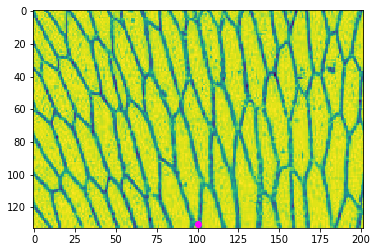

In [206]:
# define the end point to calculate paths

xend = 100
yend = 130

plt.imshow(img)
plt.scatter(xend,yend, c="magenta") # end

end = np.array([yend,xend])

In [207]:
xval_paths = []
yval_paths = []
cost_vals = []
    

for i in range(thresh.shape[0]):
    
    if i%20==0:
        print(i)

    for j in range(thresh.shape[1]):
        
        if thresh[i][j] == 0:
            
            start = np.array([i,j])
            
            path, cost = route_through_array(thresh, start, end)
            ypath, xpath = zip(*path)
            xval_paths.append(xpath)
            yval_paths.append(ypath)
            cost_vals.append(cost)


0
20
40
60
80
100
120


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


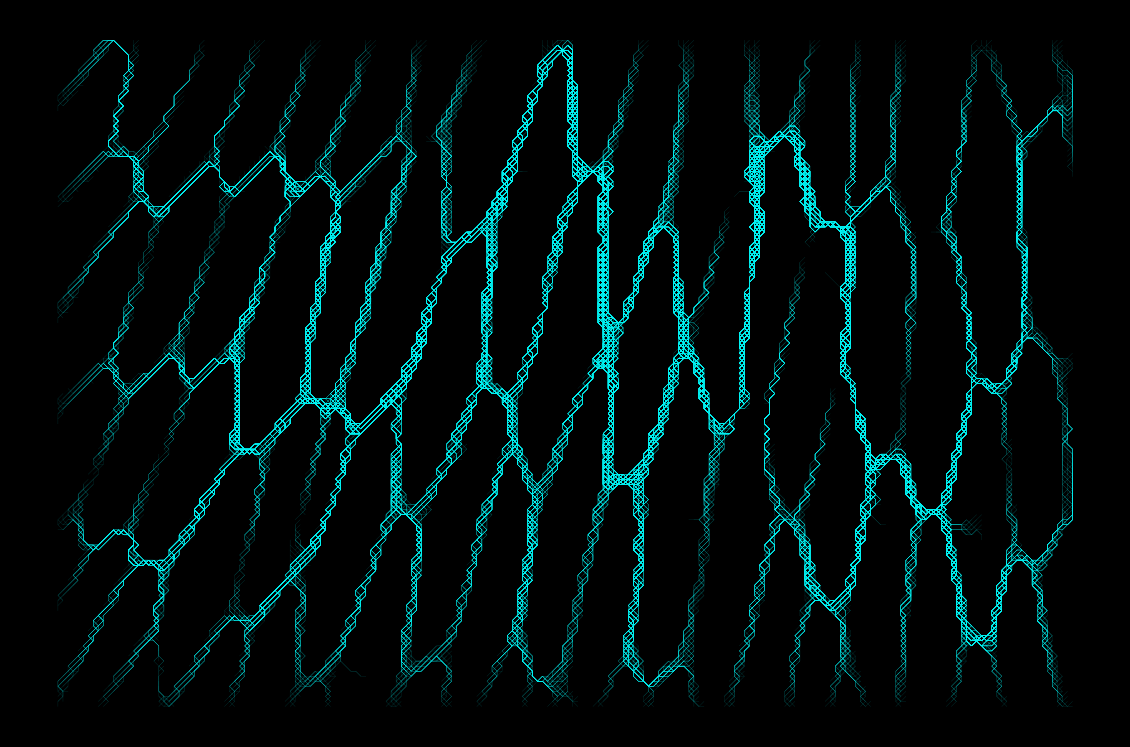

In [208]:
fc = "black"
pc = "cyan"

plt.figure(figsize=(20,20),facecolor=fc)

for p in range(len(xval_paths)):
    
    if p%500==0:
        print(p)
        
    plt.plot(xval_paths[p],yval_paths[p],c=pc,lw=0.3,alpha=0.25)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("off")
    
plt.savefig('test3.jpg', facecolor=fc, edgecolor='none')

